In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re

In [3]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dtool_db/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)

In [5]:
datadir_list

['/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_960.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_1120.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_2200.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_840.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_220.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_2240.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_1160.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_1340.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.00_1820.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametri

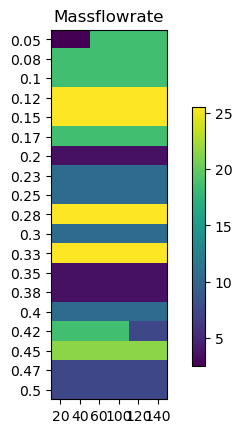

In [9]:
pat = r'\d+\.\d+'
pat2 = r'(?<=_)\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.round(np.linspace(0.001,0.75,75),2)
    radii[5] = 0.17
    radii[11] = 0.33
    radii[17] = 0.47
    press = np.linspace(2,230, 115)
    arr = np.empty((75, 115))
    for i in datadir_list:
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0 and extracted2!="3" and extracted2!="80":
            u = np.loadtxt(i+file)
            cu += 1
            arr[np.where(radii==float(extracted))[0], np.where(press==int(extracted2))[0]] = np.mean(np.where(u>0))
            """ax.scatter(float(extracted), int(extracted2), c=np.max(u), cmap='viridis', s=10)"""
            #ax.plot(u,pr, label=f'r= {extracted:s}')
        elif extracted2!="3" and extracted2!="80":
            u = np.loadtxt(i+file)
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==int(extracted2))[0]] = np.mean(np.where(u>0))
            #ax[0].plot(u,pr, label=f'r= {extracted:s}')
            #ax.scatter(float(extracted), int(extracted2), c=np.max(u), cmap='viridis', s=10)
        #cu+=1
    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels(press)
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/massflowrate.txt", "Massflowrate", yl='P delta', legend=True)



In [27]:
pat = r'\d+\.\d+'
pat2 = r'\d+$'

i = "abcs_1.12_123"
match = re.search(pat, i)
match2 = re.search(pat2, i)
extracted = match.group()
extracted2 = match2.group()
print(extracted)
print(extracted2)

1.12
123


In [6]:
np.linspace(0.001,.75,75)

array([0.001     , 0.01112162, 0.02124324, 0.03136486, 0.04148649,
       0.05160811, 0.06172973, 0.07185135, 0.08197297, 0.09209459,
       0.10221622, 0.11233784, 0.12245946, 0.13258108, 0.1427027 ,
       0.15282432, 0.16294595, 0.17306757, 0.18318919, 0.19331081,
       0.20343243, 0.21355405, 0.22367568, 0.2337973 , 0.24391892,
       0.25404054, 0.26416216, 0.27428378, 0.28440541, 0.29452703,
       0.30464865, 0.31477027, 0.32489189, 0.33501351, 0.34513514,
       0.35525676, 0.36537838, 0.3755    , 0.38562162, 0.39574324,
       0.40586486, 0.41598649, 0.42610811, 0.43622973, 0.44635135,
       0.45647297, 0.46659459, 0.47671622, 0.48683784, 0.49695946,
       0.50708108, 0.5172027 , 0.52732432, 0.53744595, 0.54756757,
       0.55768919, 0.56781081, 0.57793243, 0.58805405, 0.59817568,
       0.6082973 , 0.61841892, 0.62854054, 0.63866216, 0.64878378,
       0.65890541, 0.66902703, 0.67914865, 0.68927027, 0.69939189,
       0.70951351, 0.71963514, 0.72975676, 0.73987838, 0.75   

In [8]:
np.linspace(0.01,.75,74)

array([0.01      , 0.02013699, 0.03027397, 0.04041096, 0.05054795,
       0.06068493, 0.07082192, 0.0809589 , 0.09109589, 0.10123288,
       0.11136986, 0.12150685, 0.13164384, 0.14178082, 0.15191781,
       0.16205479, 0.17219178, 0.18232877, 0.19246575, 0.20260274,
       0.21273973, 0.22287671, 0.2330137 , 0.24315068, 0.25328767,
       0.26342466, 0.27356164, 0.28369863, 0.29383562, 0.3039726 ,
       0.31410959, 0.32424658, 0.33438356, 0.34452055, 0.35465753,
       0.36479452, 0.37493151, 0.38506849, 0.39520548, 0.40534247,
       0.41547945, 0.42561644, 0.43575342, 0.44589041, 0.4560274 ,
       0.46616438, 0.47630137, 0.48643836, 0.49657534, 0.50671233,
       0.51684932, 0.5269863 , 0.53712329, 0.54726027, 0.55739726,
       0.56753425, 0.57767123, 0.58780822, 0.59794521, 0.60808219,
       0.61821918, 0.62835616, 0.63849315, 0.64863014, 0.65876712,
       0.66890411, 0.6790411 , 0.68917808, 0.69931507, 0.70945205,
       0.71958904, 0.72972603, 0.73986301, 0.75      ])